In [1]:
import matplotlib
from sklearn.datasets import make_gaussian_quantiles
import matplotlib.pyplot as plt
from pandas import DataFrame
import numpy as np

In [2]:
AX1, AY1 = make_gaussian_quantiles(n_samples=40000,cov=2.5, n_features=2, n_classes=4)

In [3]:
AX2 = np.copy(AX1)
AX2[:,0] = np.interp(AX1[:,0], (np.min(AX1[:,0]), np.max(AX1[:,0])), (-15, 114))
AX2[:,1] = np.interp(AX1[:,1], (np.min(AX1[:,1]), np.max(AX1[:,1])), (-5, 109))

In [4]:
AX3 = AX2.reshape(200,200,2)
AY2 = AY1.reshape(200,200)

In [5]:
level20countD = np.zeros((200,200))
level40countD = np.zeros((200,200))
level60countD = np.zeros((200,200))
level80countD = np.zeros((200,200))

In [6]:
for i in range(200):
    for j in range(200):
        xval = int(np.floor(AX3[i][j][0]))
        yval = int(np.floor(AX3[i][j][1]))
        
        if (xval > 199 or yval > 199 or xval < 0 or yval < 0):
            continue;
        elif AY2[i][j] == 3:            
            level20countD[xval][yval] = level20countD[xval][yval] + 1;
        elif AY2[i][j] == 2:
            level40countD[xval][yval] = level40countD[xval][yval] + 1;
        elif AY2[i][j] == 1:
            level60countD[xval][yval] = level60countD[xval][yval] + 1;
        elif AY2[i][j] == 0:
            level80countD[xval][yval] = level80countD[xval][yval] + 1;

In [7]:
outD = np.zeros((100,100))

In [8]:
temp1 = []
temp2 = []
for i in range(0,100):
    for j in range(0,100): 
            temp1.append(i)
            temp2.append(j)
            if level40countD[i][j] ==0 and level60countD[i][j] == 0 and level80countD[i][j] == 0:
                outD[i][j] = 0;
            elif level80countD[i][j] > 0:
                outD[i][j] = 0.8
            elif level60countD[i][j] > 0:
                outD[i][j] = 0.6
            elif level40countD[i][j] > 0:
                outD[i][j] = 0.4  
# print(len(temp1))
# print(len(temp2))

In [9]:
outD2 = outD.reshape(10000)
dfD = DataFrame(dict(latitude = temp1, longitude = temp2, D = outD2))
dfD.to_csv(r'C:\Users\Phoenix\Desktop\Data Creation\Main Synthetic Data Analysis\Synthetic2.csv', index = False, header=True)

In [10]:
# import pandas as pd
# data = pd.read_csv(r'C:\Users\Phoenix\Desktop\Data Creation\Synthetic2.csv')
# a = np.array(data['D'])
# fig2 = plt.figure()
# plt.contour(a.reshape(100, 100), [0.4, 0.6, 0.8])
# plt.savefig('Synthetic2.png')
# plt.close()

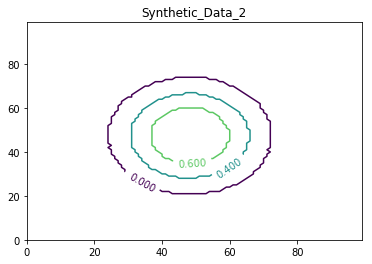

In [11]:
import pandas as pd
data = pd.read_csv(r'C:\Users\Phoenix\Desktop\Data Creation\Main Synthetic Data Analysis\Synthetic2.csv')
a = np.array(data['D'])
fig, ax = plt.subplots()
CS = ax.contour(a.reshape(100, 100), [0, 0.4, 0.6, 0.8])
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Synthetic_Data_2')
plt.savefig('Synthetic_Data_2.png')